## Attributes
1. crim: Per capita crime rate by town.
2. zn: Proportion of large residential lots (over 25,000 sq. ft.).
3. indus: Proportion of non-retail business acres per town.
4. Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
5. nox: Concentration of nitrogen oxides in the air.
6. rm: Average number of rooms per dwelling.
7. age: Proportion of old owner-occupied units built before 1940.
8. dis: Weighted distances to Boston employment centers.
9. rad: Index of accessibility to radial highways.
10. tax: Property tax rate per $10,000.


In [1]:
## Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
##import the csv
df=pd.read_csv("../Data/housing.csv")

## EDA

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Text(0.5, 1.0, 'Housing')

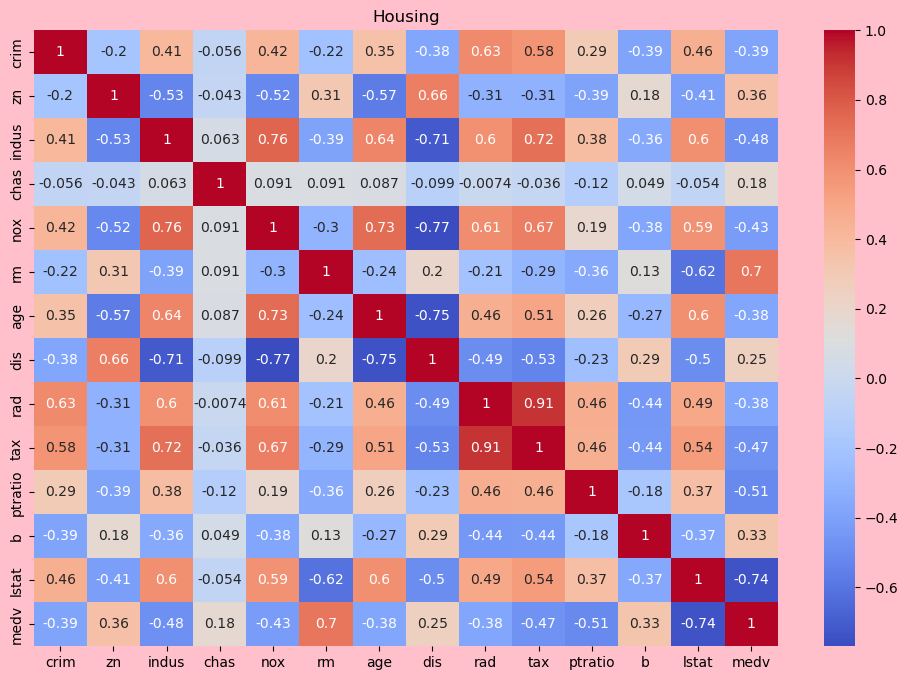

In [4]:
## Correlation matrix
plt.figure(figsize=(12,8),facecolor="pink")
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Housing")

In [5]:
## finding missing values
df.isna().sum()
#rm remove na values
df["rm"].fillna(df["rm"].mean(),inplace=True)



Text(0, 0.5, 'house price')

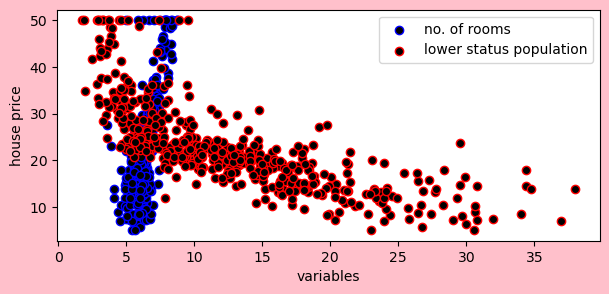

In [6]:
## ploting the graph
plt.figure(figsize=(7,3),facecolor="pink")
plt.scatter(df["rm"] ,df["medv"], color="blue", label="no. of rooms",facecolor="black")
plt.scatter(df["lstat"] ,df["medv"], color="red", label="lower status population",facecolor="black")
plt.legend()
plt.xlabel("variables")
plt.ylabel("house price")

## Preprocessing
1. split data
2. scale the data


In [7]:
X=df.drop("medv",axis=1)
Y=df["medv"] 


In [8]:
## split the data in train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [9]:
## scale the model

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_test[44:45])


[[-0.40187923 -0.50032012 -1.1000526  -0.27808871 -0.57404643  0.14160259
  -0.08785456 -0.33632405 -0.85748501 -0.80758394 -0.23285291  0.39256891
  -0.5135975 ]]


## Implement Linear regression

In [10]:
## initializing things
num_features = X_train.shape[1]
weights = np.zeros(num_features)
bias = 0
learning_rate = 0.01
iteration = 1000



## make the prediction function
def predict(num_features,weights,bias):
    return np.dot(num_features , weights) + bias

## cost function
def cost(actual_value,predicted_value):
    return np.mean((actual_value - predicted_value)**2)

## gradient descent

def gradient(num_features,actual_value,predicted_value,weights,bias,learning_rate):
    n = len(num_features)
    weight_gradient = (-2/n) * np.dot(num_features.T ,(actual_value - predicted_value))
    bias_gradient = (-2/n) *np.sum(actual_value - predicted_value)
    weights = weights - learning_rate * weight_gradient
    bias = bias - learning_rate * bias_gradient
    return weights,bias

## run the iteration to train the model
for i in range(iteration):

    ## Step 1 make initial prediction
    predicted_value = predict(X_train , weights, bias) 

    ## Step 2 calculate the error/cost function
    cost_function =  cost(Y_train,predicted_value)

    ##Step 3 Adjust weights and bias to minimize cost using gradient descent
    weights,bias = gradient(X_train,Y_train,predicted_value,weights,bias,learning_rate)
    if i%100 == 0:
        print(f"Iteration {i} : Cost = {cost_function}")

   


Iteration 0 : Cost = 606.5553960396039
Iteration 100 : Cost = 32.63461788157655
Iteration 200 : Cost = 22.6768475303668
Iteration 300 : Cost = 22.18874035024662
Iteration 400 : Cost = 22.00937312893546
Iteration 500 : Cost = 21.905410100918555
Iteration 600 : Cost = 21.840591587682226
Iteration 700 : Cost = 21.79811473948483
Iteration 800 : Cost = 21.769069614357438
Iteration 900 : Cost = 21.7485042664179


In [11]:
## testing the model
final_predictions = predict(X_test, weights , bias)

In [12]:
def r2_score(Y_test, final_predictions):
    ss_residual = np.sum((Y_test - final_predictions) ** 2)
    ss_total = np.sum((Y_test - np.mean(Y_test)) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

def mean_squared_error(Y_test, final_predictions):
    errors = Y_test - final_predictions
    mse = np.mean(errors ** 2)
    return mse

def root_mean_squared_error(Y_test, final_predictions):
    mse = mean_squared_error(Y_test, final_predictions)
    rmse = np.sqrt(mse)
    return rmse

mse = mean_squared_error(Y_test, final_predictions)
rmse = root_mean_squared_error(Y_test, final_predictions)
r2 = r2_score(Y_test, final_predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

MSE: 24.815871415986955
RMSE: 4.981553112834084
R^2 Score: 0.661603829141962


In [13]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
single_sample = [-0.40187923, -0.50032012, -1.1000526 , -0.27808871, -0.57404643 , 0.14160259,
  -0.08785456 ,-0.33632405, -0.85748501 ,-0.80758394, -0.23285291,  0.39256891,
  -0.5135975]
output = predict(single_sample , weights ,bias)
print(f"predicted value {i} : {output} ")

predicted value 999 : 27.387396107376343 


In [15]:
print(X_test[44:45])
print(f"Actual value {i}: {Y_test[44:45]}")


[[-0.40187923 -0.50032012 -1.1000526  -0.27808871 -0.57404643  0.14160259
  -0.08785456 -0.33632405 -0.85748501 -0.80758394 -0.23285291  0.39256891
  -0.5135975 ]]
Actual value 999: 90    22.6
Name: medv, dtype: float64


In [16]:
Y_dash= predict (X , weights , bias)

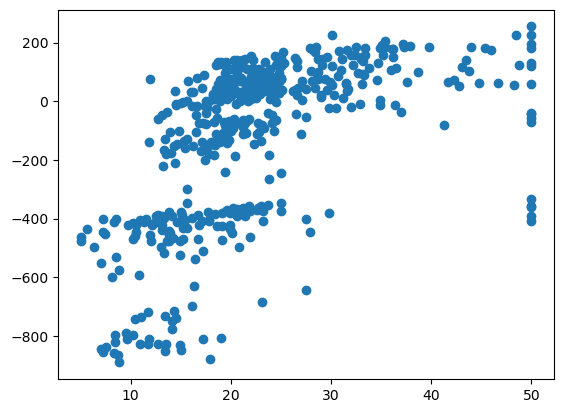

In [17]:
plt.scatter( Y , Y_dash)